In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# 날짜별 데이터프레임
df = pd.read_excel("전처리_데이터_6월.xlsx")
df_pm10 = df[df['측정항목'] == 'PM10']
df_pm2_5 = df[df['측정항목'] == 'PM2.5']
df_pm2_5

,지역,측정항목,기간,농도
1,서울,PM2.5,2020-06-22,22
3,서울,PM2.5,2020-06-23,24
5,서울,PM2.5,2020-06-24,19
7,경기,PM2.5,2020-06-22,24
9,경기,PM2.5,2020-06-23,27
11,경기,PM2.5,2020-06-24,19
13,인천,PM2.5,2020-06-22,17
15,인천,PM2.5,2020-06-23,17
17,인천,PM2.5,2020-06-24,16


In [15]:
# 시각화 사전 준비
sns.set_context("talk")
sns.set_style("white")

# 한글 사용 준비
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

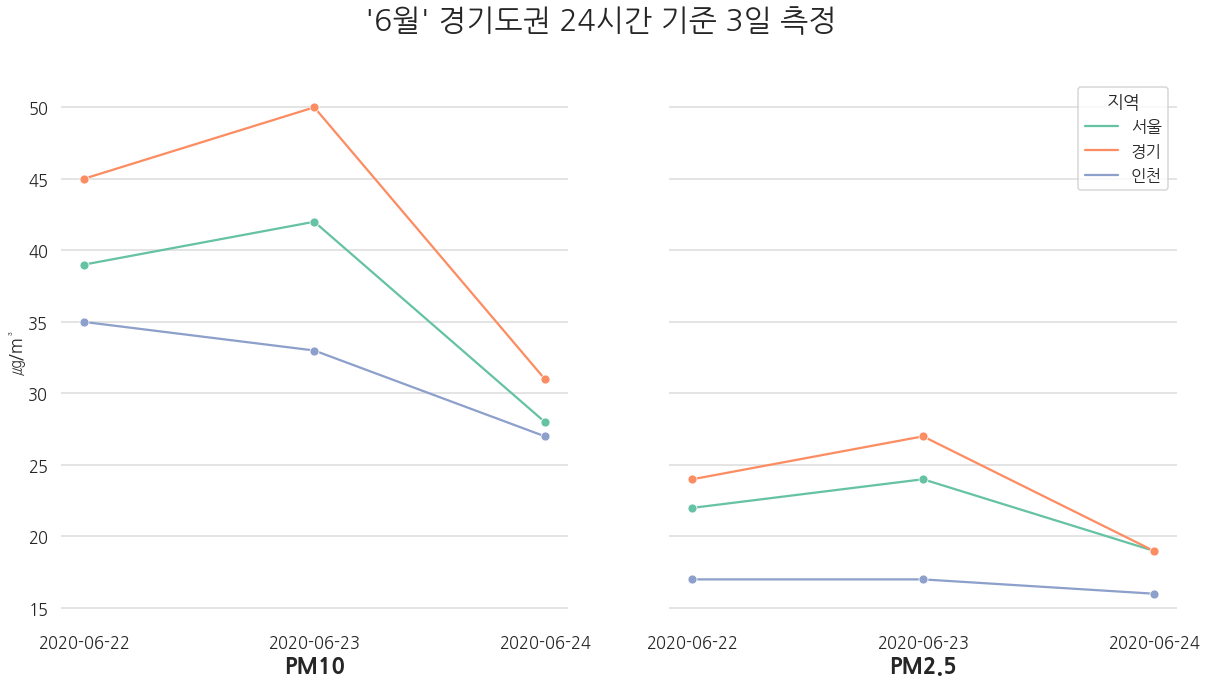

In [16]:
# subplots 3개 만들기 (y축 공유 = 세로 동일)
fig, axes = plt.subplots(ncols=2, figsize=(20, 10), sharey=True)
plt.suptitle("'6월' 경기도권 24시간 기준 3일 측정",fontsize=30)

# 농도별(PM10, PM2.5) 그래프 나누기
df_pm10_lineplot=sns.lineplot(x="기간", y="농도", hue="지역",  palette="Set2",
                data=df_pm10, ax=axes[0], marker='o');
df_pm2_5_lineplot=sns.lineplot(x="기간", y="농도", hue="지역", palette="Set2",
                data=df_pm2_5, ax=axes[1], marker='o');

df_pm10_lineplot.grid(axis="y", color='gainsboro')
df_pm2_5_lineplot.grid(axis="y", color='gainsboro')

# x축 제목 변경
axes[0].set_xlabel("PM10", fontsize=22, fontweight = 'bold')
axes[1].set_xlabel("PM2.5", fontsize=22, fontweight = 'bold')

# y축 이름 변경
axes[0].set_ylabel("㎍/m³")
axes[1].set_ylabel("")

# y축 단위 설정
import matplotlib.ticker as ticker
axes[0].yaxis.set_major_locator(ticker.MultipleLocator(5))
axes[0].set_ylim(14,52)

# 그래프가 들어있는 각 박스 삭제
sns.despine(bottom=False, left=False, ax=axes[0])
sns.despine(bottom=False, left=False, ax=axes[1])

df_pm10_lineplot.spines["left"].set_visible(False)
df_pm2_5_lineplot.spines["left"].set_visible(False)

df_pm10_lineplot.spines["bottom"].set_visible(False)
df_pm2_5_lineplot.spines["bottom"].set_visible(False)

# 1번째 범례 삭제 (hide legend)
axes[0].legend([],[], frameon=False)

# 그래프 위 수치 나타내기
for p in axes[0].patches:
    axes[0].annotate("%.f" % p.get_height(),
      (p.get_x()+p.get_width()/2, p.get_height() + 1), ha='center', va='top', color='dimgrey', size=18)

for p in axes[1].patches:
    axes[1].annotate("%.f" % p.get_height(),
      (p.get_x()+p.get_width()/2, p.get_height() + 1), ha='center', va='top', color='dimgrey', size=18)